In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pathlib 
import random

## Deep Learning Libraries

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
#from keras.preprocessing.image import load_img, img_to_array
import keras.utils as image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, MobileNet, VGG16, InceptionV3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [ ]:
# !uzip -q '/content/drive/MyDrive/DeepLearning2-SentimentAnalysis/Archive'

# unzip and put it in the same folder
# !unzip '/content/drive/MyDrive/DeepLearning2-SentimentAnalysis/Archive.zip'

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/DeepLearning2-SentimentAnalysis/Archive/train',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        subset='training')

validation_generator = valid_datagen.flow_from_directory('/content/drive/MyDrive/DeepLearning2-SentimentAnalysis/Archive/train',
                                                        target_size=(48, 48),
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        subset='validation')



In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/DL2-Project/Archive/archive/train/',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 22971 images belonging to 7 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/DL2-Project/Archive/archive/train/',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 5742 images belonging to 7 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/DL2-Project/Archive/archive/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 7175 images belonging to 7 classes.


In [ ]:
path = '/content/drive/MyDrive/DL2-Project/Archive/archive/train/'
data_dir = pathlib.Path(path)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['.DS_Store', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise'], dtype='<U9')

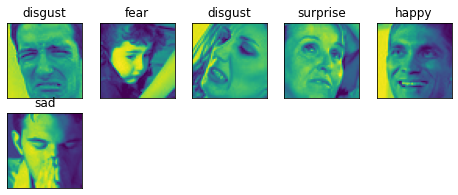

In [ ]:
plt.figure(figsize=(8,8))

for i in range(6):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.jpg"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [ ]:
# Using pre-trained models
#VGG_base_model = tf.keras.applications.VGG16(input_shape=(48,48,3), include_top=False, weights="imagenet")
#Inception_base_model = tf.keras.applications.InceptionV3(input_shape=(75,75,3), include_top=False, weights="imagenet")
#Resnet_base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")
#MobileNet_base_model = tf.keras.applications.MobileNet(input_shape=(48,48,3),include_top=False,weights="imagenet") 

# use from directory
directory = "content/yolov8m.pt"
# get model from directory
model = torch.load(directory)

94765736/94765736 [==============================] - 1s 0us/step


In [5]:
import torch
from yolov5.models.yolo import Model

# Load the pretrained YOLOv5 model
directory = "yolov5m.pt"  # Update the path to the YOLOv5 model file
checkpoint = torch.load(directory)
model = Model(checkpoint['model'].yaml)
model.load_state_dict(checkpoint['model'].state_dict())

# Freeze the top layers
for name, param in model.named_parameters():
    if not name.startswith('model.24'):  # Assuming you want to freeze all layers except the last one
        param.requires_grad = False

# Replace the last layer with a new one, adjust the number of classes
num_classes = 2  # Update the number of classes as per your use case
model.model[-1].nc = num_classes  # Set the number of classes in the Detect layer

# Reinitialize the last layer's weights
for m in model.modules():
    if isinstance(m, (torch.nn.Conv2d, torch.nn.BatchNorm2d)):
        m.reset_parameters()


                 from  n    params  module                                  arguments                     
  0                -1  1      5280  yolov5.models.common.Conv               [3, 48, 6, 2, 2]              
  1                -1  1     41664  yolov5.models.common.Conv               [48, 96, 3, 2]                
  2                -1  2     65280  yolov5.models.common.C3                 [96, 96, 2]                   
  3                -1  1    166272  yolov5.models.common.Conv               [96, 192, 3, 2]               
  4                -1  4    444672  yolov5.models.common.C3                 [192, 192, 4]                 
  5                -1  1    664320  yolov5.models.common.Conv               [192, 384, 3, 2]              
  6                -1  6   2512896  yolov5.models.common.C3                 [384, 384, 6]                 
  7                -1  1   2655744  yolov5.models.common.Conv               [384, 768, 3, 2]              
  8                -1  2   4134912  

In [ ]:
# freezing the top layers for each base model

#for layer in VGG_base_model.layers[:-3]:
    #layer.trainable=False

# for layer in Resnet_base_model.layers[:-4]:
    #layer.trainable=False

#for layer in Inception_base_model.layers[:-2]:
    #layer.trainable=False

#for layer in MobileNet_base_model.layers[:-4]:
    #layer.trainable=False

In [ ]:
## Defining different classes of emotion
num_classes = 7

## Define image size
img_rows,img_cols = 48,48

## Deifne the batch
batch_size = 64

In [ ]:
# Adding layers for resnet(we should use that for other models too)

model1=Sequential()
model1.add(Resnet_base_model) # we can use any of pre-trained model 
model1.add(Flatten())
model1.add(Dense(32,kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.7))
model1.add(Dense(16,kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.7))
model1.add(Dense(16,kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dense(7,activation='softmax'))

print(model1.summary())

from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

model1.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
epochs=20


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 32)                262176    
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 32)                0         
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
history=model1.fit(train_dataset,
                validation_data=valid_dataset,
                epochs=epochs,
                verbose = 1,
                callbacks=callbacks)

Epoch 1/20
359/359 [==============================] - ETA: 0s - loss: 1.9335 - accuracy: 0.2216
Epoch 1: val_loss improved from inf to 1.83948, saving model to Emotion_little_vgg.h5
359/359 [==============================] - 74s 193ms/step - loss: 1.9335 - accuracy: 0.2216 - val_loss: 1.8395 - val_accuracy: 0.2551 - lr: 0.0010
Epoch 2/20
359/359 [==============================] - ETA: 0s - loss: 1.8376 - accuracy: 0.2393
Epoch 2: val_loss improved from 1.83948 to 1.81836, saving model to Emotion_little_vgg.h5
359/359 [==============================] - 68s 188ms/step - loss: 1.8376 - accuracy: 0.2393 - val_loss: 1.8184 - val_accuracy: 0.2511 - lr: 0.0010
Epoch 3/20
359/359 [==============================] - ETA: 0s - loss: 1.8230 - accuracy: 0.2456
Epoch 3: val_loss improved from 1.81836 to 1.80669, saving model to Emotion_little_vgg.h5
359/359 [==============================] - 68s 189ms/step - loss: 1.8230 - accuracy: 0.2456 - val_loss: 1.8067 - val_accuracy: 0.2529 - lr: 0.0010
Epoch

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Testing A new model without using any pre-trained ones

In [ ]:
## Defining different classes of emotion
num_classes = 7

## Define image size
img_rows,img_cols = 48,48

## Deifne the batch
batch_size = 64

In [ ]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
epochs=40

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 activation_22 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_20 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                     

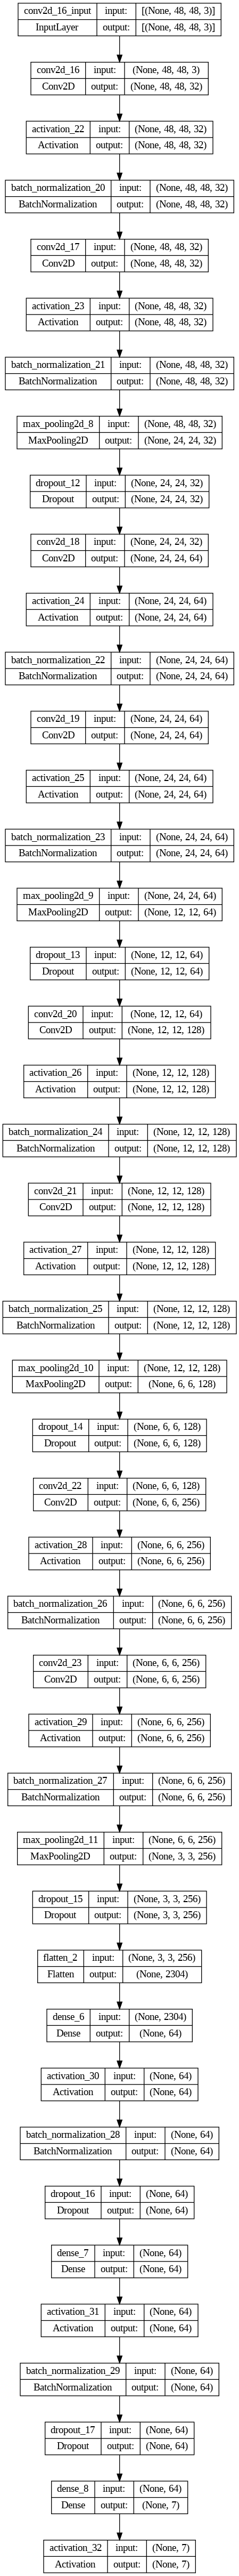

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet1.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet1.png') 

In [ ]:
history=model.fit(train_dataset,
                validation_data=valid_dataset,
                epochs=epochs,
                verbose = 1,
                callbacks=callbacks)

Epoch 1/40
359/359 [==============================] - ETA: 0s - loss: 2.3570 - accuracy: 0.1855 

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()